In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df_holiday_data = pd.read_csv("../data/reshape_dataset/holiday_data.csv")
df_sales_data = pd.read_csv("../data/reshape_dataset/sales_data.csv")
df_weather_data = pd.read_csv("../data/reshape_dataset/weather_data.csv")

In [3]:
df_weather_data['date'] = pd.to_datetime(df_weather_data['date'], format='%Y/%m/%d')
df_weather_data = df_weather_data.query('date < "2023-01-01"') 
df_sales_data['date'] = pd.to_datetime(df_sales_data['date'], format='%Y/%m/%d')
df_holiday_data['date'] = pd.to_datetime(df_holiday_data['date'], format='%Y/%m/%d')
print(len(df_weather_data['date']))
print(len(df_sales_data['date']))
print(len(df_holiday_data['date']))

730
730
730


In [4]:
df_merge = pd.merge(df_weather_data, df_holiday_data)
df_merge['store_holiday'] = df_sales_data['store_horiday']

In [5]:
X = np.array(df_merge.loc[:,"min_temp":"holiday_status"], dtype='float64')
y = np.array(df_sales_data['sales'])
X = np.nan_to_num(X, copy=False)

In [27]:
# モジュールを読み込む
from sklearn.model_selection import train_test_split
from pygam import LinearGAM

# ラベル付きデータをトレーニングセット (X_train, y_train)とテストセット (X_test, y_test)に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.05, shuffle=True)

In [28]:
print(X_train)
gam = LinearGAM().fit(X_train,y_train)
gam.summary()

[[20.5 24.1 23.  ...  4.   8.   0. ]
 [24.1 29.7 25.8 ...  3.   8.   0. ]
 [19.  25.1 19.5 ...  4.   9.   1. ]
 ...
 [24.4 33.  24.8 ...  6.   8.   0. ]
 [17.3 20.1 18.  ...  4.   5.   0. ]
 [ 9.5 14.9 10.  ...  1.  12.   0. ]]
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     281.183
Link Function:                     IdentityLink Log Likelihood:                                 -14089.744
Number of Samples:                          693 AIC:                                             28743.854
                                                AICc:                                           29133.8302
                                                GCV:                                        858765066.9585
                       

<ipython-input-28-368fdc6644a8>:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [29]:
predict_gam = gam.predict(X_test)

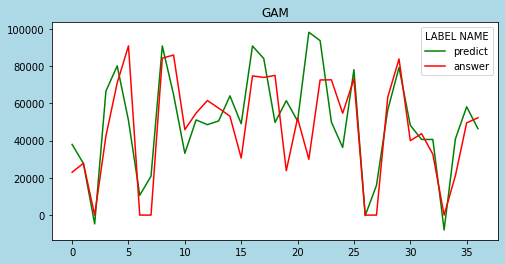

In [30]:
import matplotlib.pyplot as plt

x = list(range(len(X_test)))

fig = plt.figure(figsize = (8,4), facecolor='lightblue')
plt.title("GAM")
y1, = plt.plot(x, predict_gam, color="g", label="predict")
y2, = plt.plot(x, y_test, color="r", label="actually")
plt.legend([y1, y2],
           ["predict", "answer"],
           loc=1, 
           title="LABEL NAME")
plt.show()

In [31]:
import lightgbm as lgb

trains = lgb.Dataset(X_train,y_train)
valids = lgb.Dataset(X_test,y_test)

params = {
    "objective": "regression",
    "metrics": "mae"
}

model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000, early_stopping_rounds=100)

/Users/taka.baya/.pyenv/versions/3.8.5/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5169
[LightGBM] [Info] Number of data points in the train set: 693, number of used features: 53
[LightGBM] [Info] Start training from score 52528.025974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l1: 21144.7
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l1: 19642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l1: 18226.8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l1: 16980.7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l1: 16118.9
[LightGBM] [Warning] No 

In [32]:
predict_lgb = model.predict(X_test)

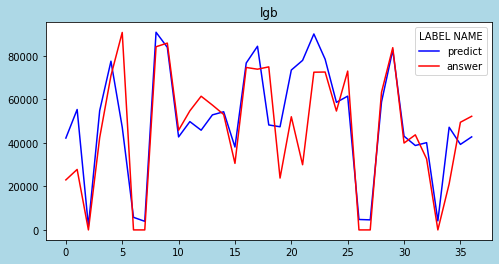

In [33]:
import matplotlib.pyplot as plt

x = list(range(len(X_test)))
fig = plt.figure(figsize = (8,4), facecolor='lightblue')
plt.title("lgb")
y1, = plt.plot(x, predict_lgb, color="b", label="predict")
y2, = plt.plot(x, y_test, color="r", label="answer")
plt.legend([y1, y2],
           ["predict", "answer"],
           loc=1, 
           title="LABEL NAME")
plt.show()